In [7]:
#!pip install twstock

In [8]:
#!pip install lxml

Text(0.5, 1.0, '0050')

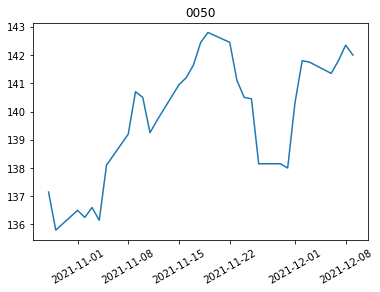

In [9]:
import twstock
import numpy as np
import matplotlib.pyplot as plt
stock = twstock.Stock("0050")
price = np.array(stock.price)
date = stock.date
plt.plot(date,price)
plt.xticks(rotation = 30)
plt.title("0050")

In [10]:
# 尋找峰值
from scipy.signal import argrelextrema
max_index = argrelextrema(price, np.greater)[0]
peak = price[max_index]  
print(f"peak:{peak}")

peak:[136.5  136.6  140.7  142.8  141.8  142.35]


In [11]:
# 尋找峰值
from scipy.signal import argrelextrema
max_index = argrelextrema(price, np.greater)[0]
peak = price[max_index]  
print(f"peak:{peak}")

peak:[136.5  136.6  140.7  142.8  141.8  142.35]


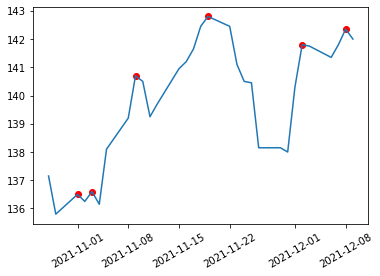

In [12]:
# 繪圖峰值
plt.plot(date,price)
plt.xticks(rotation = 30)
for index in max_index:
    plt.scatter(date[index],price[index],c="r")
plt.show()

In [13]:
# 計算移動平均
import pandas as pd
series_price = pd.Series(price)
series_price_ma3 = series_price.rolling(3).mean()
series_price_ma5 = series_price.rolling(5).mean()

Text(0.5, 1.0, '0050')

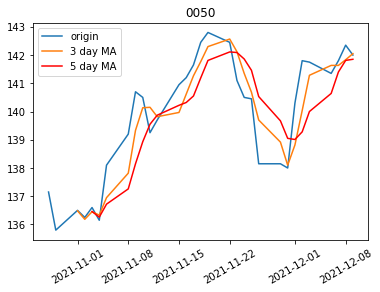

In [14]:
# 移動平均繪圖比較
p1 = plt.plot(date,series_price)
p2 = plt.plot(date,series_price_ma3)
p3 = plt.plot(date,series_price_ma5,c="r")
plt.legend(['origin', '3 day MA', "5 day MA"])
plt.xticks(rotation = 30)
plt.title("0050")

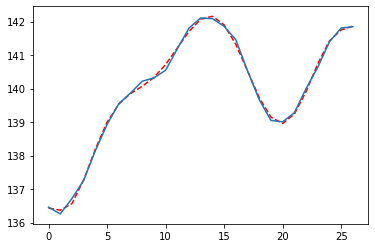

In [15]:
# 取出np類型的資料
y = np.array(series_price_ma5)[4:]
x = np.array(range(len(y)))
# 用polyfit去擬合曲線
parameter=np.polyfit(x,y,10) # 以一個10次方程去擬合
parameter_fn=np.poly1d(parameter)
plt.plot(parameter_fn(x),c="r",linestyle="--")
plt.plot(x,y)

## 混淆矩陣(Confusion Matrix)——

- 正確率(Accuracy)——全部對多少
- 敏感度 (Sensitivity)、回想率 (recall)——把握住多少機會
- 準確度 (Specificity)——避開多少雷
- 精準率 (precision)——出手押中了有多少
- F1-score——平衡Precision和Recall的指標